In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# data = pd.read_csv(r'database_valid.csv', encoding = 'latin-1', sep = ';')
data = pd.read_csv("https://covid-nma.com/dataviz/data/database_valid.csv", sep = ";",encoding='latin-1').drop(index = [0])

df = pd.DataFrame(data)
# print(df)

In [3]:
trials_tmp1 = df.loc[df['Treatment type'] == 'Other antimicrobials']
trials_tmp2 = df.loc[df['Treatment type'] == 'Antimalaria']
merge_tmp = [trials_tmp1, trials_tmp2]
trials = pd.concat(merge_tmp)
trials = trials[['Trial ID', 'Treatment name', 'Treatment type', 'n randomized in this arm']]

In [4]:
treatments_type_antimicro = trials_tmp1['Treatment name'].tolist()
treatments_type_antimala = trials_tmp2['Treatment name'].tolist()

In [5]:
types_unique_antimala = []
for t in treatments_type_antimala : 
    if t not in types_unique_antimala :
        types_unique_antimala.append(t)
types_unique_antimala

['Hydroxychloroquine',
 'Chloroquine',
 'Mefloquine',
 'Alexoquine',
 'Artemisinin',
 'Artemisinin-piperaquine',
 'Artesunate',
 'Atovaquone',
 'Pyronaridine artesunate',
 'Artesunate-amodiaquine',
 'Tafenoquine',
 'Artemether lumefantrine',
 'Azithromycin',
 'GNS561',
 'Ivermectin']

In [6]:
types_unique_antimicro = []
for t in treatments_type_antimicro : 
    if t not in types_unique_antimicro :
        types_unique_antimicro.append(t)
types_unique_antimicro

['Carrimycin',
 'Immunoglobulin',
 'Azithromycin',
 'Teicoplanin',
 'Minocyline',
 'Senicapoc',
 'Ivermectin',
 'Niclosamide',
 'Levamisole',
 'Kolimycin',
 'Doxycycline',
 'Azithromycin+amoxicillin+clavulanate',
 'Amoxicillin+clavulanate',
 'Human immunoglobulin',
 'Doxycycline+ivermectin',
 'Metronidazole',
 'Clofazimine',
 'Cotrimoxazole',
 'Rapamycin',
 'Clarithromycin',
 'Ceftriaxone+macrolide',
 'Levofloxacin OR Moxifloxacin',
 'Piperacillin-tazobactam+macrolide',
 'Ceftaroline+macrolide',
 'Amoxicillin-clavulanate+macrolide',
 'Demethylchlortetracycline',
 'Doxycyline+ivermectin',
 'Doxycycline\xa0',
 'Tetracycline hydrochloride',
 'Brilacidin']

In [7]:
trials_list = trials.values.tolist()
#print(trials_list)
comparisons = [[0 for i in range(len(types_unique_antimala))] for i in range(len(types_unique_antimicro))]
comparisons_nb = [[0 for i in range(len(types_unique_antimala))] for i in range(len(types_unique_antimicro))]

In [8]:
for i in range(len(trials_list)):
    temp = 0
    trial_id_1, name_1, type_1, nb_1 = trials_list[i][0], trials_list[i][1], trials_list[i][2], trials_list[i][3]
    for u in trials_list[i+1:]:
        if u[0] == trial_id_1 and u[2]!= type_1:
            temp = 1
            type_2, name_2, nb_2 = u[2], u[1], u[3]
            for v in range(len(types_unique_antimicro)):
                if name_1 == types_unique_antimicro[v] :
                    index_list1 = v
            for t in range(len(types_unique_antimala)):
                if name_2 == types_unique_antimala[t]:
                    index_list2 = t
    if temp == 1 :
        comparisons[index_list1][index_list2] += 1
        comparisons_nb[index_list1][index_list2] += float(nb_1)

In [9]:
comparisons

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

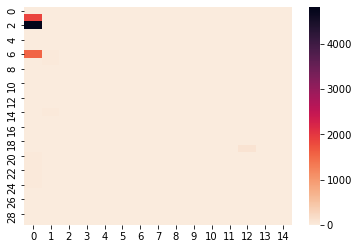

In [10]:
cmap = sb.cm.rocket_r
# heatmap_test = sb.heatmap(comparisons,cmap = cmap)
heatmap_test_nb = sb.heatmap(comparisons_nb,cmap = cmap)
# fig = heatmap_test.get_figure()
fig1 = heatmap_test_nb.get_figure()
# fig.savefig('Test_fig_heatmap.png')
fig1.savefig('Test_fig_heatmap_nb.png')

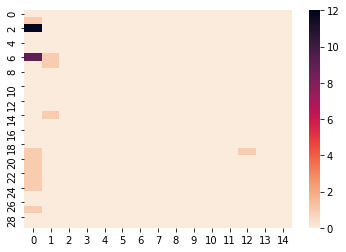

In [11]:
cmap = sb.cm.rocket_r
# heatmap_test = sb.heatmap(comparisons,cmap = cmap)
heatmap_test_nb = sb.heatmap(comparisons,cmap = cmap)
# fig = heatmap_test.get_figure()
fig1 = heatmap_test_nb.get_figure()
# fig.savefig('Test_fig_heatmap.png')
fig1.savefig('Test_fig_heatmap_nb.png')

In [5]:
!jupyter nbconvert --to script HeatmapPointRouge.ipynb

[NbConvertApp] Converting notebook HeatmapPointRouge.ipynb to script
[NbConvertApp] Writing 3404 bytes to HeatmapPointRouge.py
